In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


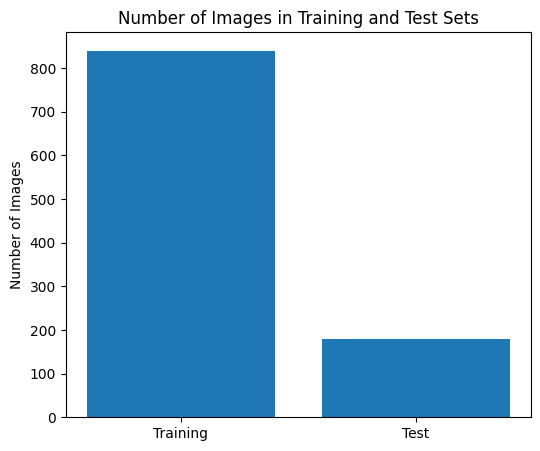

Number of training images: 840
Number of test images: 180
Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
None
1/1 [==============================] - 1s 837ms/step
The predic

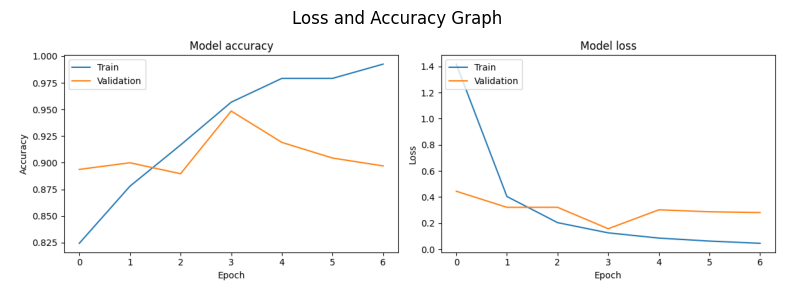

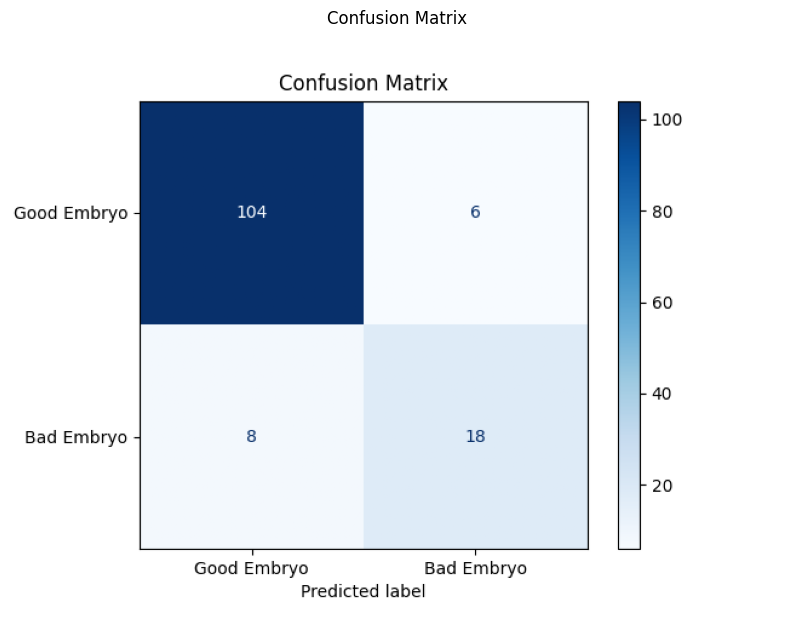

Accuracy of the model is 90.62%


In [6]:
from tensorflow.keras.preprocessing import image as kimage
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array



train = pd.read_csv('/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/test.csv')

# Assuming train.shape[0] and test.shape[0] hold the counts of training and test images respectively
counts = [train.shape[0], test.shape[0]]
labels = ['Training', 'Test']

plt.figure(figsize=(6, 5))
plt.bar(labels, counts)
plt.ylabel('Number of Images')
plt.title('Number of Images in Training and Test Sets')
plt.show()

print("Number of training images:", train.shape[0])
print("Number of test images:", test.shape[0])


FRAME_WIDTH = 255
FRAME_HEIGHT = 255


# Define the function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(FRAME_HEIGHT, FRAME_WIDTH))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

Pred_model = load_model('/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/model_checkpoints/embryoclassification.h5')

print("Model Summary:")
print(Pred_model.summary())


# Define the path to your image file
image_path = '/content/D5_017.jpg'  # Replace this with your image file path

# Load and preprocess the image
img = load_and_preprocess_image(image_path)

# Make predictions
predictions = Pred_model.predict(np.array([img]))

# Assuming it's a classification task, get the predicted class
predicted_class = np.argmax(predictions, axis=1)

if predicted_class == 0:
    embryo_label = 'Good Stage : A good quality embryo typically exhibits well-formed, evenly sized cells without severe fragmentation.\n These embryos are more likely to successfully implant and develop into a viable pregnancy,\n boasting higher chances of contributing to a successful conception'
else:
    embryo_label = 'Bad stage : This embryo is severely fragmented and has unevenly sized cells. \n It is a poor quality embryo.\n This embryo probably does not have much chance to implant and make a viable pregnancy'

print(f"The predicted label for the embryo is in {embryo_label}")


# Load the first image
img_path_1 = '/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/loss_and_accuracy.png'
img_1 = mpimg.imread(img_path_1)

# Display the first image with a title
plt.figure(figsize=(10, 10))
plt.imshow(img_1)
plt.title('Loss and Accuracy Graph')
plt.axis('off')  # Hide axes
plt.show()

# Load the second image
img_path_2 = '/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/confusion_matrix.png'
img_2 = mpimg.imread(img_path_2)

# Display the second image with a title
plt.figure(figsize=(10, 10))
plt.imshow(img_2)
plt.title('Confusion Matrix')
plt.axis('off')  # Hide axes
plt.show()


print("Accuracy of the model is 90.62%")




In [2]:
from django.shortcuts import render
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt

def predict_image(request):
    return render(request, 'predict.html')

def predict_image_result(request):
    train = pd.read_csv('/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/test.csv')

    counts = [train.shape[0], test.shape[0]]
    labels = ['Training', 'Test']

    plt.figure(figsize=(6, 5))
    plt.bar(labels, counts)
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Training and Test Sets')
    plt.savefig('/path/to/static/number_of_images.png')  # Save the image in the static folder
    plt.close()

    FRAME_WIDTH = 255
    FRAME_HEIGHT = 255

    def load_and_preprocess_image(image_path):
        img = load_img(image_path, target_size=(FRAME_HEIGHT, FRAME_WIDTH))
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize pixel values
        return img_array

    Pred_model = load_model('/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/model_checkpoints/embryoclassification.h5')

    image_path = '/content/D5_386.jpg'
    img = load_and_preprocess_image(image_path)
    predictions = Pred_model.predict(np.array([img]))
    predicted_class = np.argmax(predictions, axis=1)

    if predicted_class == 0:
        embryo_label = 'Good Stage: A good quality embryo typically exhibits well-formed, evenly sized cells without severe fragmentation.\nThese embryos are more likely to successfully implant and develop into a viable pregnancy, boasting higher chances of contributing to a successful conception'
    else:
        embryo_label = 'Bad stage: This embryo is severely fragmented and has unevenly sized cells.\nIt is a poor quality embryo.\nThis embryo probably does not have much chance to implant and make a viable pregnancy'

    img_path_1 = '/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/loss_and_accuracy.png'
    img_path_2 = '/content/drive/MyDrive/AIS_BE_Projects/AIS_Embryo_Project/Embryo_classification /hvwc23/confusion_matrix.png'

    context = {
        'embryo_label': embryo_label,
        'img_path_1': img_path_1,
        'img_path_2': img_path_2,
        'accuracy': "Accuracy of the model is 90.62%"
    }

    return render(request, 'predict_result.html', context)
